In [1]:
#Description: This Program detects breast cancer off a given dataset.

In [2]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [3]:
#Load the dataset
df = pd.read_csv("Dataset/bcdataset.csv")

In [4]:
df.head(7) #in diagnosis column: M = Malignant(cancerous cell), B = Benign(Non-cancerous cel)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [5]:
#counting the number of rows and columns in the dataset
df.shape

(569, 33)

In [6]:
#Getting the number of NaN(empty) values in our dataset
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#Dropping the column with missing values(the unnamed column)
df = df.dropna(axis=1)

In [8]:
#Getting the new count of the number of rows and columns
df.shape

(569, 32)

In [9]:
#Get the number of the Malignant(M) and Benign(B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

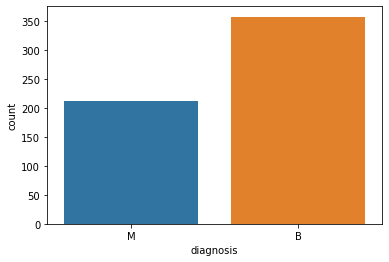

In [10]:
#Visualizing the count
sns.countplot(df['diagnosis'], label='count')

In [11]:
#Checking the datatypes to see which columns need to be encoded/transformed
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [12]:
#Encoding the categorical data values, M = 1, B = 0
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

C:\Users\Will.000\Documents\Python_Scripts\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Will.000\Documents\Python_Scripts\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


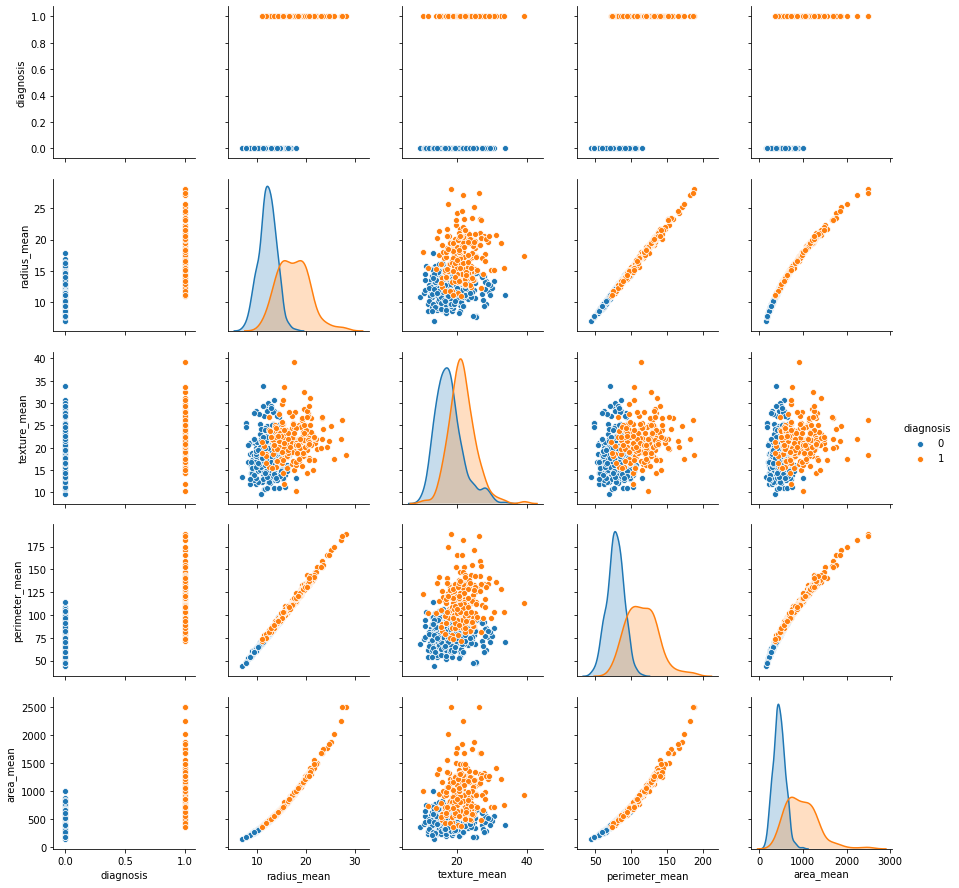

In [13]:
# Creating a pair plot
sns.pairplot(df.iloc[:,1:6], hue='diagnosis')

In [14]:
# print first few rows
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# Get the correlation of the data

df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


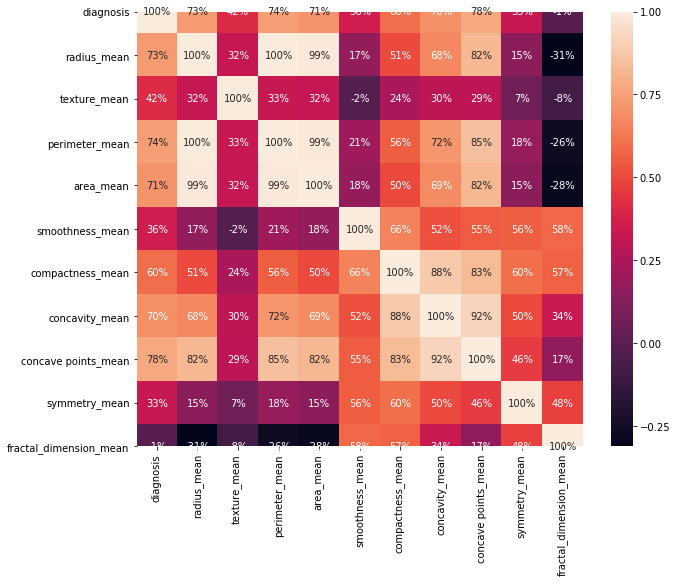

In [16]:
# Visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%')

In [17]:
#split into independent(X) and dependent(Y) datasets

X = df.iloc[:,1:31].values
Y = df.iloc[:,1].values

In [18]:
# 75% training
# 25% testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [19]:
# Scale the data (Feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
# Creating a function for the models

def models(X_train, Y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    #Print the accuracy of each model on the training data
    print('[0] Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
    print('[1] Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
    print('[2] Random Forest Classifier Training Accuracy: ', forest.score(X_train, Y_train))
    
    return log, tree, forest

In [21]:
# Getting all the models

model = models(X_train, Y_train)

C:\Users\Will.000\Documents\Python_Scripts\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0] Logistic Regression Training Accuracy:  1.0
[1] Decision Tree Training Accuracy:  1.0
[2] Random Forest Classifier Training Accuracy:  1.0


In [22]:
# test our model on the testing data using confusion matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model', i)
    print( classification_report(Y_test, model[i].predict(X_test)))
    print( accuracy_score(Y_test, model[i].predict(X_test)))
    print()

Model 0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        53

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

1.0

Model 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        53

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

1.0

Model 2
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        90
           1       0.98      1.00      0.99        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0

In [47]:
# print the prediciton of the Decision Tree Classifier Model & accuracy score

decision_pred = model[1].predict(X_test)
print(decision_pred)
#Model Accuracy
dtacc = accuracy_score(Y_test, decision_pred)
print()
print("Decision Tree Classifier Accuracy: " + str(dtacc))


[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

Decision Tree Classifier Accuracy: 1.0


In [50]:
# print the prediciton of the Logistic Regression Classifier Model & accuracy score
log_reg = model[0].predict(X_test)
print(log_reg)
print()
# Model Accuracy
logreg_acc = accuracy_score(Y_test, log_reg)
print("Logistic Regression Classifier Accuracy: " + str(logreg_acc))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

Logistic Regression Classifier Accuracy: 1.0


In [52]:
# print the prediciton of the Random Forest Classifier Model & accuracy score
randomForest = model[2].predict(X_test)
print(randomForest)
print()
# Model Accuracy
rm_acc = accuracy_score(Y_test, randomForest)
print("Random Forest Classifier Accuracy: " + str(rm_acc))

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

Random Forest Classifier Accuracy: 0.993006993006993


# Artifical Neural Network

In [24]:
#Building Our Model
# Initialising the ANN
classifier = Sequential()

#Input and 1st Hidden Layer
classifier.add(Dense(units = 20,
                     activation = 'relu',
                     kernel_initializer = 'uniform',
                     input_dim = 30))
classifier.add(Dropout(p = 0.1))


#2nd Hidden Layer
classifier.add(Dense(units = 20,
                     activation = 'relu',
                     kernel_initializer = 'uniform'))
classifier.add(Dropout(p = 0.1))   


#3rd Hidden Layer
classifier.add(Dense(units = 20,
                     activation = 'relu',
                     kernel_initializer = 'uniform'))
classifier.add(Dropout(p = 0.2))               

#Output Layer
classifier.add(Dense(units = 1,
                     activation = 'sigmoid',
                     kernel_initializer = 'uniform'))
               
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy']) 
classifier.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\Will.000\Documents\Python_Scripts\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Will.000\Documents\Python_Scripts\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\Will.000\Documents\Python_Scripts\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total para

In [25]:
#training our ANN Model
classifier.fit(X_train, Y_train, batch_size = 8, epochs = 200)




Epoch 1/200





426/426 [==============================] - 5s 11ms/step - loss: 0.6808 - acc: 0.6901
Epoch 2/200
426/426 [==============================] - 0s 624us/step - loss: 0.3715 - acc: 0.9718
Epoch 3/200
426/426 [==============================] - 0s 443us/step - loss: 0.0939 - acc: 0.9812
Epoch 4/200
426/426 [==============================] - 0s 502us/step - loss: 0.0495 - acc: 0.9906
Epoch 5/200
426/426 [==============================] - 0s 584us/step - loss: 0.0386 - acc: 0.9930
Epoch 6/200
426/426 [==============================] - 0s 530us/step - loss: 0.0319 - acc: 0.9930
Epoch 7/200
426/426 [==============================] - 0s 474us/step - loss: 0.0194 - acc: 0.9953
Epoch 8/200
426/426 [==============================] - 0s 460us/step - loss: 0.0182 - acc: 0.9953
Epoch 9/200
426/426 [==============================] - 0s 659us/step - loss: 0.0112 - acc: 0.9977
Epoch 10/200
426/426 [==============================] - 0s 514us/step - loss: 0.0099 - acc: 0.9977
Epoch 11/200

426/426 [==============================] - 0s 450us/step - loss: 4.7744e-05 - acc: 1.0000
Epoch 64/200
426/426 [==============================] - 0s 368us/step - loss: 1.6212e-04 - acc: 1.0000
Epoch 65/200
426/426 [==============================] - 0s 368us/step - loss: 7.4066e-05 - acc: 1.0000
Epoch 66/200
426/426 [==============================] - 0s 422us/step - loss: 2.8690e-05 - acc: 1.0000
Epoch 67/200
426/426 [==============================] - 0s 462us/step - loss: 3.3358e-05 - acc: 1.0000
Epoch 68/200
426/426 [==============================] - 0s 467us/step - loss: 5.1133e-05 - acc: 1.0000
Epoch 69/200
426/426 [==============================] - 0s 380us/step - loss: 1.0541e-05 - acc: 1.0000
Epoch 70/200
426/426 [==============================] - 0s 406us/step - loss: 3.4919e-05 - acc: 1.0000
Epoch 71/200
426/426 [==============================] - 0s 415us/step - loss: 2.4846e-05 - acc: 1.0000
Epoch 72/200
426/426 [==============================] - 0s 443us/step - loss: 2.3578e-

426/426 [==============================] - 0s 483us/step - loss: 5.7952e-06 - acc: 1.0000
Epoch 143/200
426/426 [==============================] - 0s 380us/step - loss: 4.2398e-06 - acc: 1.0000
Epoch 144/200
426/426 [==============================] - 0s 436us/step - loss: 1.4957e-05 - acc: 1.0000
Epoch 145/200
426/426 [==============================] - 0s 422us/step - loss: 8.1466e-07 - acc: 1.0000
Epoch 146/200
426/426 [==============================] - 0s 467us/step - loss: 9.5902e-07 - acc: 1.0000
Epoch 147/200
426/426 [==============================] - 0s 502us/step - loss: 4.1274e-05 - acc: 1.0000
Epoch 148/200
426/426 [==============================] - 0s 474us/step - loss: 5.2632e-06 - acc: 1.0000
Epoch 149/200
426/426 [==============================] - 0s 408us/step - loss: 1.2692e-06 - acc: 1.0000
Epoch 150/200
426/426 [==============================] - 0s 476us/step - loss: 2.4781e-05 - acc: 1.0000
Epoch 151/200
426/426 [==============================] - 0s 460us/step - loss:

In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

## Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
ann_pred = classifier.predict(X_test)
ann_pred = (ann_pred > 0.5)

#Model Evaluation
ann = accuracy_score(Y_test, ann_pred)
print('Accuracy Score: ' + str(ann))

print('Precision Score: ' + str(precision_score(Y_test, ann_pred)))

print('Recall Score: ' + str(recall_score(Y_test, ann_pred)))

print('F1 Score: ' + str(f1_score(Y_test, ann_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, ann_pred)))

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        53

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



In [27]:
print(ann_pred)
print()
print(Y_test)

[[ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 

# Linear Support Vector

In [31]:
from datetime import datetime as dt
from sklearn.svm import SVC

st=dt.now()
l_svc = SVC(kernel = 'linear')
l_svc.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

l_pred = l_svc.predict(X_test)

#Model Evaluation
lsvcacc = accuracy_score(Y_test, l_pred)
print('Accuracy Score: ' + str(lsvcacc))

print('Precision Score: ' + str(precision_score(Y_test, l_pred)))

print('Recall Score: ' + str(recall_score(Y_test, l_pred)))

print('F1 Score: ' + str(f1_score(Y_test, l_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, l_pred)))

Time taken to complete random search:  0:00:00.007995
Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        53

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



# K Nearest Neighbours Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

st=dt.now()
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)


knn_pred = knn.predict(X_test)

#Model Evaluation
kacc = accuracy_score(Y_test, knn_pred)
print('Accuracy Score: ' + str(kacc))

print('Precision Score: ' + str(precision_score(Y_test, knn_pred)))

print('Recall Score: ' + str(recall_score(Y_test, knn_pred)))

print('F1 Score: ' + str(f1_score(Y_test, knn_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, knn_pred)))

Time taken to complete random search:  0:00:00.141257
Accuracy Score: 0.993006993006993
Precision Score: 1.0
Recall Score: 0.9811320754716981
F1 Score: 0.9904761904761905
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.98      0.99        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



# Model accuracy plot

In [54]:
print('\n                             Accuracy')
print('                            -------------')

print('Logistic Regression        : {:.04} %'.format(logreg_acc * 100))
print('KNN Classifier             : {:.04} %'.format(kacc * 100))
print('Linear SVC                 : {:.04} %'.format(lsvcacc * 100))
print('Decision Trees Classifier  : {:.04} %'.format(dtacc * 100))
print('Random Forest Classifier   : {:.04} %'.format(rm_acc * 100))
print('Artificial Neural Network  : {:.04} %'.format(ann * 100))


                             Accuracy
                            -------------
Logistic Regression        : 100.0 %
KNN Classifier             : 99.3 %
Linear SVC                 : 100.0 %
Decision Trees Classifier  : 100.0 %
Random Forest Classifier   : 99.3 %
Artificial Neural Network  : 100.0 %


Text(0.5, 1.0, 'Accuracy Comparism')

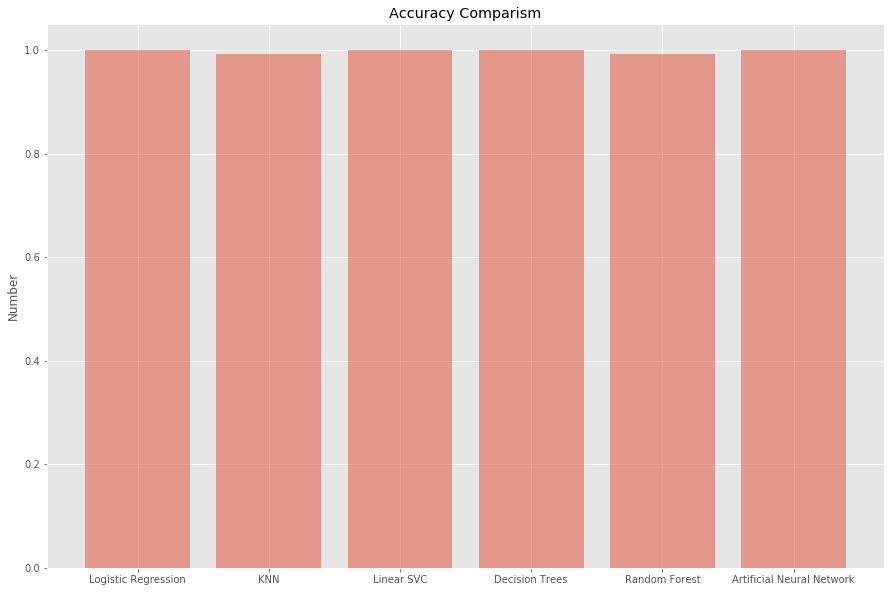

In [56]:
figure = plt.figure(figsize=(15, 10))
# Visualizing the results
objects = ['Logistic Regression',
           'KNN', 
           'Linear SVC', 
           'Decision Trees', 
           'Random Forest', 
           'Artificial Neural Network']
y_pos = np.arange(len(objects))
plt.bar(y_pos,[logreg_acc,kacc,lsvcacc,dtacc,rm_acc, ann],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Accuracy Comparism')

# Save The Model and Classifiers

In [57]:
#Random Forest Model
import pickle
filename = 'Breast_Cancer.sav'
pickle.dump(decision_pred, open(filename, 'wb'))

In [58]:
classifier.save("ANN_rest_Cancer.h5")